# crash_dt_720

Investigate crash with dt=720s

See `/short/v45/aek156/access-om2/control/01deg_jra55_ryf_dt_720`


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Eliminate margins
# from https://stackoverflow.com/questions/44298864/how-can-i-eliminate-the-gray-border-around-jupyter-ipython-notebooks-in-my-brows
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import netCDF4 as nc
import IPython.display

import cosima_cookbook as cc
import xarray as xr


netcdf_index loaded.


In [4]:
cc.build_index()

Files found but not yet indexed: 0
No new .nc files found.


True

In [5]:
allspeed = cc.get_nc_variable('01deg_jra55v13_ryf8485_spinup6_dt_720', 'ocean.nc', 'speed_max')

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 0: max  at lon 20.0, lat -38.2064190606, depth 33.6245984139


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 1: max  at lon 53.9, lat 76.8635765631, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 2: max  at lon 54.3, lat 76.9058159175, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 3: max  at lon -40.3, lat 63.6513698385, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 4: max  at lon -40.3, lat 63.6513698385, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 5: max  at lon 23.3, lat -38.8323300169, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 6: max  at lon 50.4, lat -66.2614986136, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 7: max  at lon 20.9, lat -39.9911883643, depth 0.541280765392


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


timestep 8: max  at lon 53.9, lat 76.8635765631, depth 0.541280765392


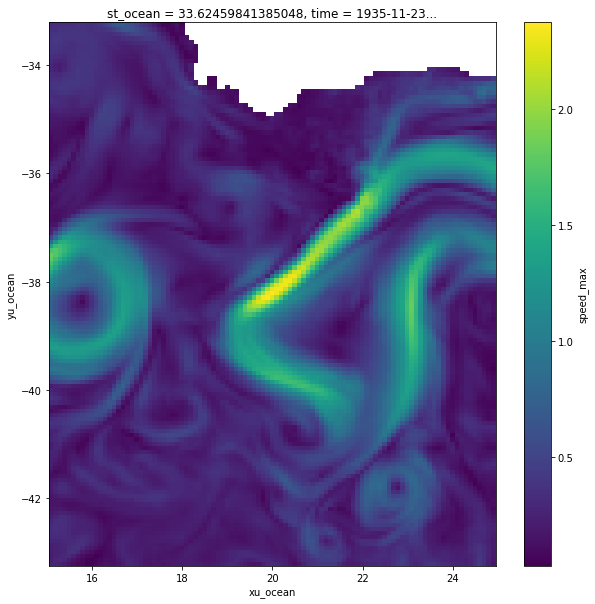

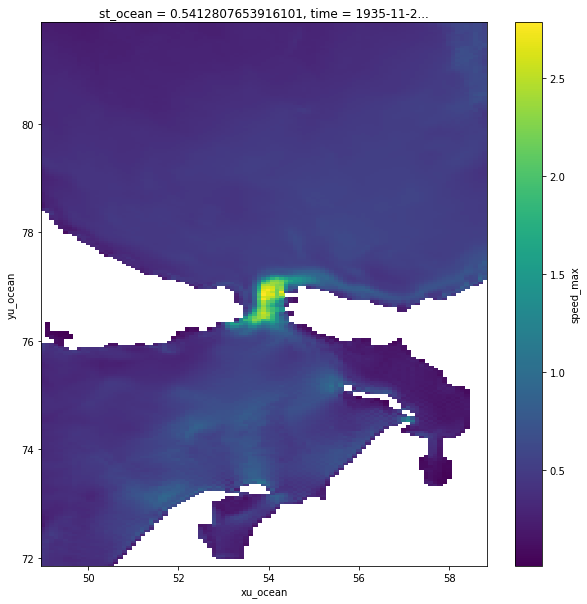

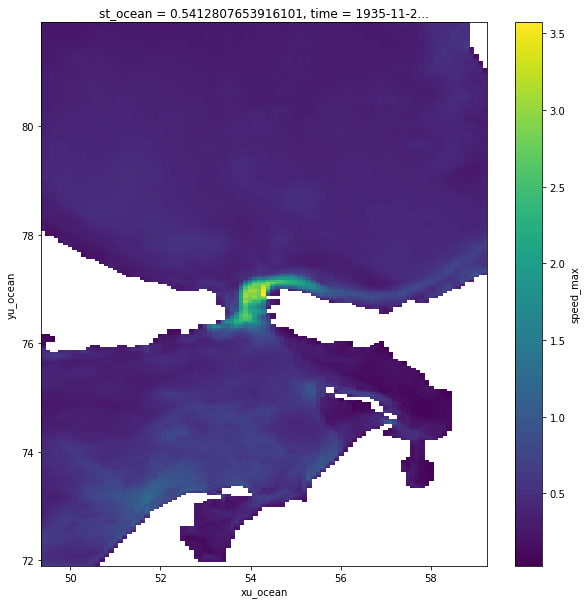

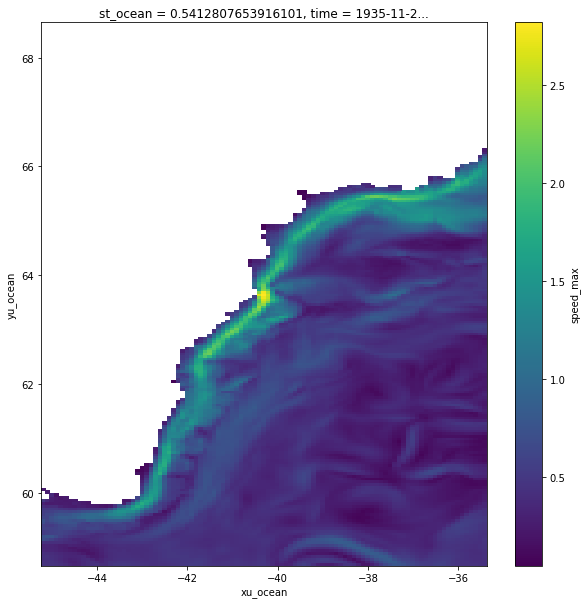

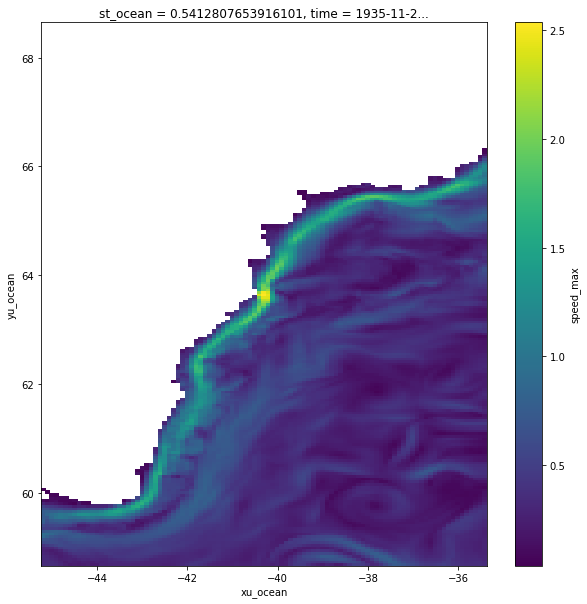

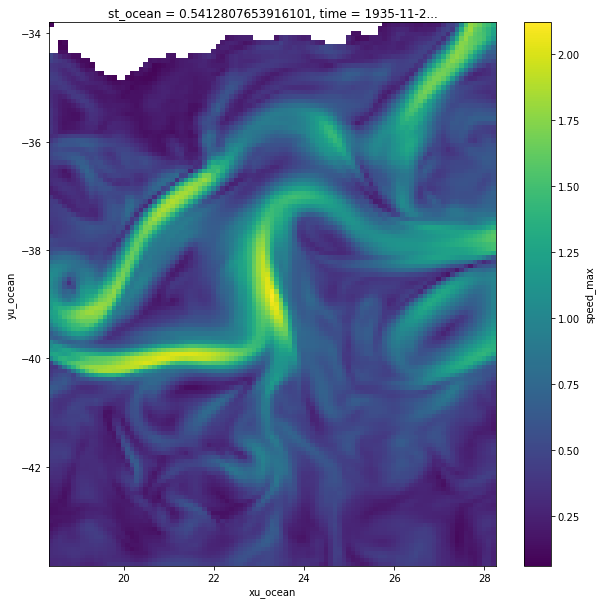

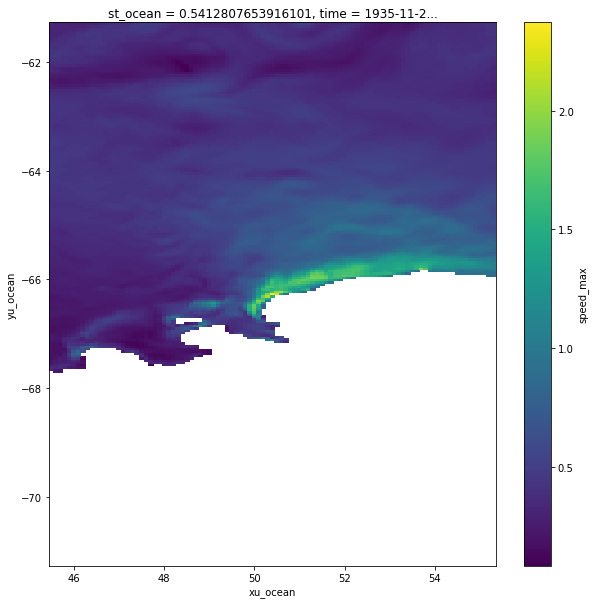

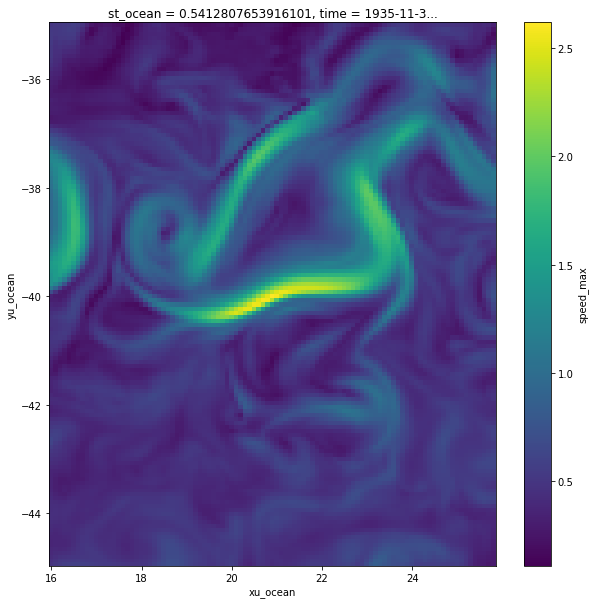

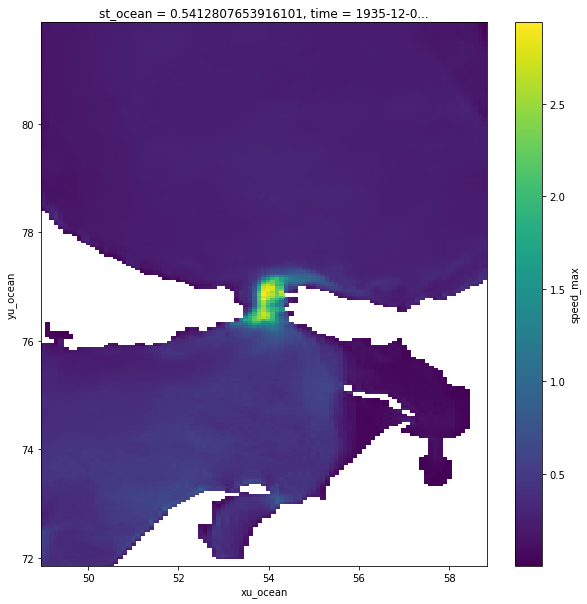

In [8]:
depths = []
lons = []
lats = []
for tt in range(np.shape(allspeed)[0]):
    speed = allspeed[tt,:,:,:]
    maxspeedidx = speed.where(speed==speed.max(), drop=True)
    lon = maxspeedidx.get_index('xu_ocean').values[0]
    lat = maxspeedidx.get_index('yu_ocean').values[0]
    depth = maxspeedidx.get_index('st_ocean').values[0]
    lons.append(lon)
    lats.append(lat)
    depths.append(depth)
    print('timestep {0}: max {1} at lon {2}, lat {3}, depth {4}'.format(str(tt), '', str(lon), str(lat), str(depth)))
    plt.figure(figsize=(10,10))
    speed.sel(st_ocean=depth,method='nearest').sel(xu_ocean=slice(lon-5,lon+5)).sel(yu_ocean=slice(lat-5,lat+5)).plot()

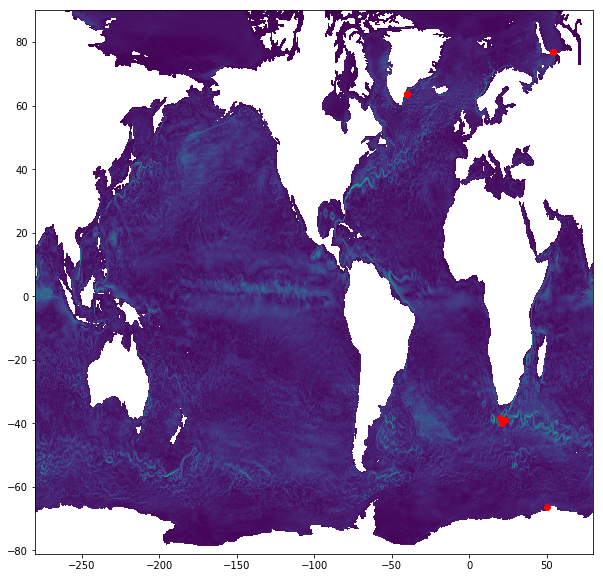

In [7]:
plt.figure(figsize=(10,10))
plt.pcolormesh(speed.get_index('xu_ocean').values,speed.get_index('yu_ocean').values,speed[0,:,:])
plt.scatter(lons,lats,color='r')